In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn import svm

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline

# Let's suppress future warning
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
data_path = os.path.join("dataset","bank","bank-full.csv")
# Let's read in the dataset and display first 10 rows
# The data is ';' separated
features = pd.read_csv(data_path, delimiter=';')
features[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
features.shape

(45211, 17)

In [16]:
# Convert the biany output 'yes', 'no' to '1' and '0'
features.loc[features['y'] =='no', 'y'] = 0
features.loc[features['y'] =='yes', 'y'] = 1

In [17]:
features = pd.get_dummies(features)

In [18]:
features[:5]

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
# Labels are the values we want to predict
y = features['y']

In [20]:
# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['y'], axis = 1)

In [21]:
X = pd.get_dummies(X)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### LogisticRegression Model
Let's start with logistic regession model on the data.

In [23]:
# instantiate the model (using the default parameters)
# we will fine tune the parameters later to see the effect on the model
model_log_reg = LogisticRegression()

# fit the model with data
model_log_reg.fit(X_train,y_train)

# Predict on the test data
y_pred=model_log_reg.predict(X_test)

In [24]:
# But we can also look at the individual probabilities of the predictions
model_log_reg.predict_proba(X_test)

array([[0.9932983 , 0.0067017 ],
       [0.215498  , 0.784502  ],
       [0.98019654, 0.01980346],
       ...,
       [0.99299148, 0.00700852],
       [0.9807143 , 0.0192857 ],
       [0.441828  , 0.558172  ]])

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9706,  272],
       [ 854,  471]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

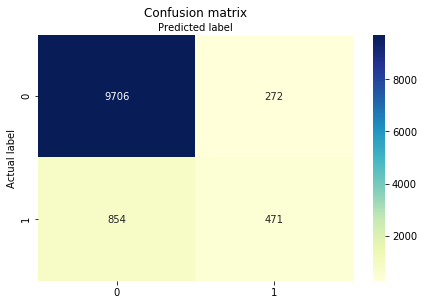

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9003804299743431
Precision: 0.6339165545087483
Recall: 0.35547169811320756


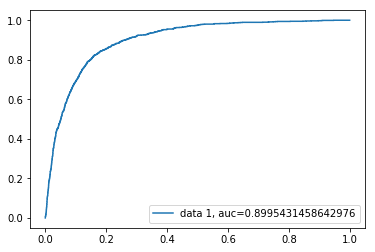

In [28]:
y_pred_proba = model_log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Stochastic Gradient Classifier
Scikit Learn's SGDClassifier has the advantage of being able to handle large datasat efficiently. Let's see how it is used.

In [33]:
# Let's try different value of 'n_iter' (aka epoch)
# sgd_classf = SGDClassifier(random_state=42) # max_iter = None (Default)
sgd_classf = SGDClassifier(random_state=42, max_iter =1000)

In [34]:
sgd_classf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
y_pred = sgd_classf.predict(X_test)

In [46]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8564098027072459
Precision: 0.4122497055359246
Recall: 0.5283018867924528


#### Let's measure the accuracy by doing a cross validation
Note that "CV=3" means we are splitting the training set into 3 folds. This function will then make predictions and evaluate them on each fold using a model trained on the remaining fold.

(Aurélien Géron. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'rielly. 2017, 83)

In [47]:
score = cross_val_score(sgd_classf,X_train,y_train,cv=3,scoring="accuracy")

In [48]:
np.mean(score)

0.8554596574376626

### Random Forests Model
Let's look at the effect of another model on the data.

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. (Wikipedia)

In [49]:
# Create the model with 1000 trees
model_rnd_for_clf = RandomForestClassifier(n_estimators=1000,
                                           bootstrap = True,
                                           max_features = 'sqrt',
                                           random_state = 42)
# Fit on training data
model_rnd_for_clf.fit(X_train,y_train);

In [50]:
# Actual class predictions
y_pred = model_rnd_for_clf.predict(X_test)
# Probabilities for each class
y_pred_proba = model_rnd_for_clf.predict_proba(X_test)[::,1]

In [51]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9034769530213218
Precision: 0.639618138424821
Recall: 0.40452830188679245


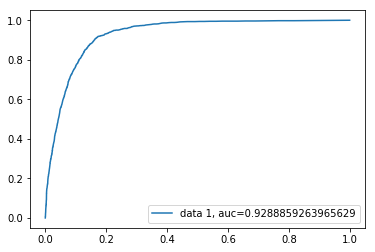

In [52]:
# Calculate roc auc
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Naive bayes classifier

In [53]:
nb_model = GaussianNB()

In [54]:
nb_model.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
y_pred = nb_model.predict(X_test)

In [56]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.854109528443776
Precision: 0.40888638920134984
Recall: 0.5486792452830188


### Ensemble Methods
When we want improvement on the performance of different machine learning models, Ensemble methods can help us combine them to produce the desired improvement.

Lets see how this can be done.

#### Bagging

In [58]:
# Creat bagging classifiers based on the previous predictors
bagging1 = BaggingClassifier(base_estimator=model_log_reg, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=sgd_classf, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=model_rnd_for_clf, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=nb_model, n_estimators=10, max_samples=0.8, max_features=0.8)

In [60]:
labels = ['Bagging Logistic Regression',
          'Bagging SGD Classifier',
          'Bagging Random Forest Classifier',
          'Bagging Naive Bayes Classifier']

bagging_list = [bagging1, 
                bagging2, 
                bagging3, 
                bagging4]

for bg, lb in zip(bagging_list, labels):
    bg.fit(X_train, y_train)
    scores = cross_val_score(bg, X_train, y_train, cv=3, scoring='accuracy',  n_jobs=4, verbose=1)
    print("Accuracy: %.4f (+/- %.4f) [%s]" %(scores.mean(), scores.std(), lb))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   44.5s finished


Accuracy: 0.9027 (+/- 0.0026) [Bagging Logistic Regression]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:  1.1min finished


Accuracy: 0.8767 (+/- 0.0115) [Bagging SGD Classifier]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed: 16.7min finished


Accuracy: 0.9037 (+/- 0.0027) [Bagging Random Forest Classifier]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    8.0s finished


Accuracy: 0.8577 (+/- 0.0007) [Bagging Naive Bayes Classifier]
